# CPI DATA

*Aniket Pant, HACKGT 9*

In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
%matplotlib inline

In [296]:
# Creating a function which will remove extra leading
# and tailing whitespace from the data.
# pass dataframe as a parameter here
def whitespace_remover(dataframe):
    # iterating over the columns
    for i in dataframe.columns:
        # checking datatype of each columns
        dataframe.columns.str.replace(' ', '')

In [354]:
vix_df = pd.read_csv('../data/vix-volatility-index-historical-chart.csv', header = None, names = ['Date', '$VIX'], skiprows = 16, parse_dates = True)
vix_df['Date'] = pd.to_datetime(vix_df['Date'])
vix_df = vix_df.dropna()

In [355]:
average_price_ref = pd.read_csv("../data/cpi/ap.series.txt", delimiter="\t")

In [356]:
average_price_ref.head() # this tells us what each item is and datetime length lookup

,series_id,area_code,item_code,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
0,APU0000701111,0000,701111,"Flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,M01,2022,M09
1,APU0000701311,0000,701311,"Rice, white, long grain, precooked (cost per p...",NaN,1980,M01,1981,M12
2,APU0000701312,0000,701312,"Rice, white, long grain, uncooked, per lb. (45...",NaN,1980,M01,2022,M09
3,APU0000701321,0000,701321,Spaghetti (cost per pound/453.6 grams) in U.S....,NaN,1980,M01,1981,M03
4,APU0000701322,0000,701322,"Spaghetti and macaroni, per lb. (453.6 gm) in ...",NaN,1984,M01,2022,M09


In [357]:
average_price_historic_food = pd.read_csv("../data/cpi/ap.data.3.Food.txt", delimiter="\t")
average_price_historic_food.columns = average_price_historic_food.columns.str.replace(' ', '')
average_price_historic_food['Date'] = pd.to_datetime(average_price_historic_food['year'].astype(str) + "-" + average_price_historic_food['period'].str[1:])

In [358]:
sel =average_price_historic_food.loc[average_price_historic_food['series_id'] == average_price_historic_food['series_id'][0]].sort_values(by=['Date'])

In [359]:
sel.head()

,series_id,year,period,value,footnote_codes,Date
0,APU0000701111,1980,M01,0.203,NaN,1980-01-01
1,APU0000701111,1980,M02,0.205,NaN,1980-02-01
2,APU0000701111,1980,M03,0.211,NaN,1980-03-01
3,APU0000701111,1980,M04,0.206,NaN,1980-04-01
4,APU0000701111,1980,M05,0.207,NaN,1980-05-01


Text(0.5, 1.0, 'Cost of precooked white rice, per lb')

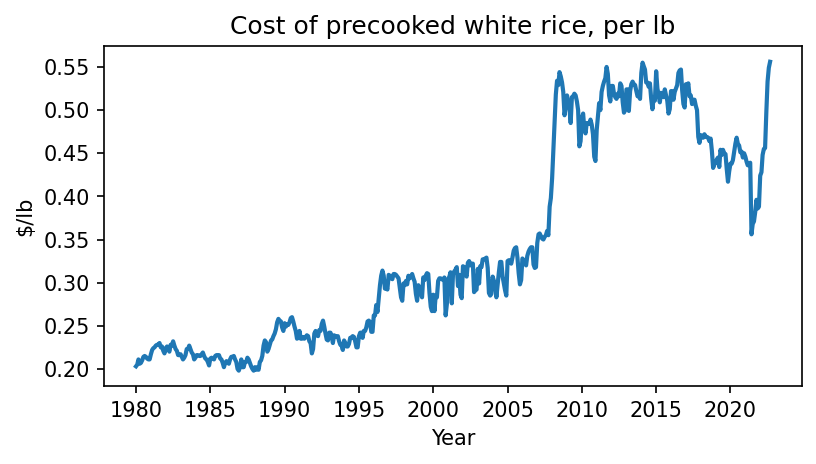

In [360]:
plt.figure(figsize = (6,3), dpi = 150)
plt.plot(sel['Date'], sel['value'], lw = 2)
plt.xlabel("Year")
plt.ylabel("$/lb")
plt.title("Cost of precooked white rice, per lb")

In [368]:
data = yf.download('GLD')
data = data.reset_index()

[*********************100%***********************]  1 of 1 completed


In [369]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-18,44.430000,44.490002,44.070000,44.380001,44.380001,5992000
1,2004-11-19,44.490002,44.919998,44.470001,44.779999,44.779999,11655300
2,2004-11-22,44.750000,44.970001,44.740002,44.950001,44.950001,11996000
3,2004-11-23,44.880001,44.919998,44.720001,44.750000,44.750000,3169200
4,2004-11-24,44.930000,45.049999,44.790001,45.049999,45.049999,6105100
...,...,...,...,...,...,...,...
4508,2022-10-17,154.919998,155.330002,153.320007,153.419998,153.419998,4348000
4509,2022-10-18,154.080002,154.240005,153.240005,153.750000,153.750000,4528400
4510,2022-10-19,152.089996,152.490005,151.539993,151.690002,151.690002,8257100
4511,2022-10-20,151.919998,153.229996,151.270004,151.449997,151.449997,5019800


(12740.0, 19286.0)

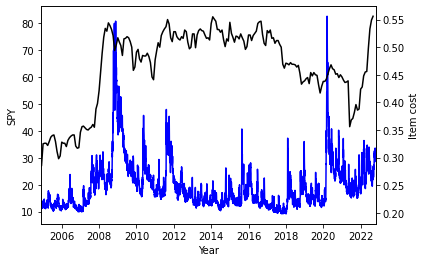

In [370]:
fig, ax1 = plt.subplots()
ax1.plot(vix_df['Date'], vix_df['$VIX'], color = "blue")
ax1.set_xlabel("Year")

ax1.set_ylabel("SPY")

ax2 = ax1.twinx()
ax2.plot(sel['Date'], sel['value'], color = "black")

ax2.set_ylabel("Item cost")

ax1.set_xlim(min(data['Date']), max(data['Date']))

In [374]:
scatter = pd.merge(data, sel, how = 'inner', on = 'Date')
scatter = scatter.set_index(["Date"])
scatter = scatter.resample("M").mean() 
scatter.index = pd.to_datetime(scatter.index, format="%Y%m").to_period('M')

m_inflation = scatter['value'].pct_change()[1:]
m_spy = scatter['Close'].pct_change()[1:]
corr_coef = np.corrcoef(m_inflation, m_spy)[0,1]

(-0.2032564462478474,
 0.19058216754346652,
 -0.15883650632863616,
 0.22054946933191993)

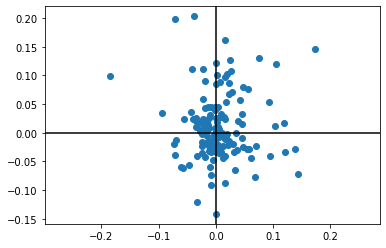

In [375]:
plt.scatter(m_inflation, m_spy)
plt.axvline(color='black')
plt.axhline(color='black')
plt.axis("equal")

<AxesSubplot:>

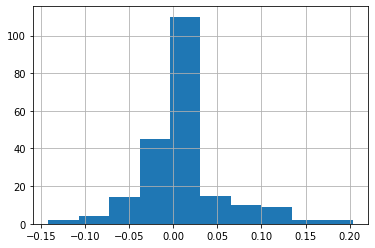

In [382]:
m_spy.hist()

In [376]:
corr_coef

0.0017733036560361242